In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../dataset/student_habits_performance.csv")
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


## Handle the missing values

In [6]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [7]:
df['parental_education_level'].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

In [8]:
# we will impute mode to the parental_education_level
from sklearn.impute import SimpleImputer
cat_imp = SimpleImputer(strategy="most_frequent")
df['parental_education_level'] = cat_imp.fit_transform(df[['parental_education_level']]).ravel()

In [9]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [10]:
df['parental_education_level'].value_counts()

parental_education_level
High School    483
Bachelor       350
Master         167
Name: count, dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

## EDA

**Bivariate Analysis**

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
num_cols = df.select_dtypes(include=['int64','float64']).columns.to_list()

print(cat_cols)
print(num_cols)

['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']


In [13]:
cat_cols.remove('student_id')

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\3069629364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="rocket")


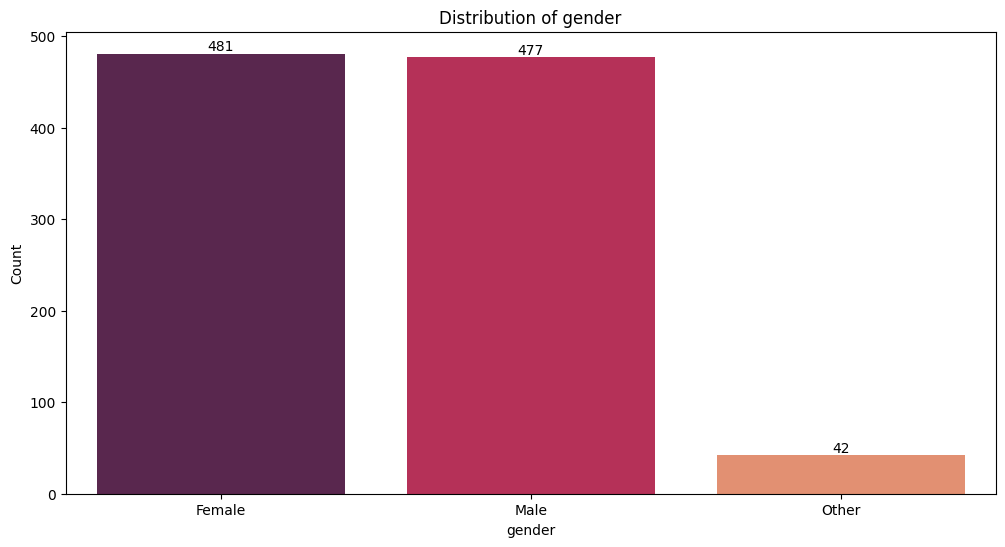

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\3069629364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="rocket")


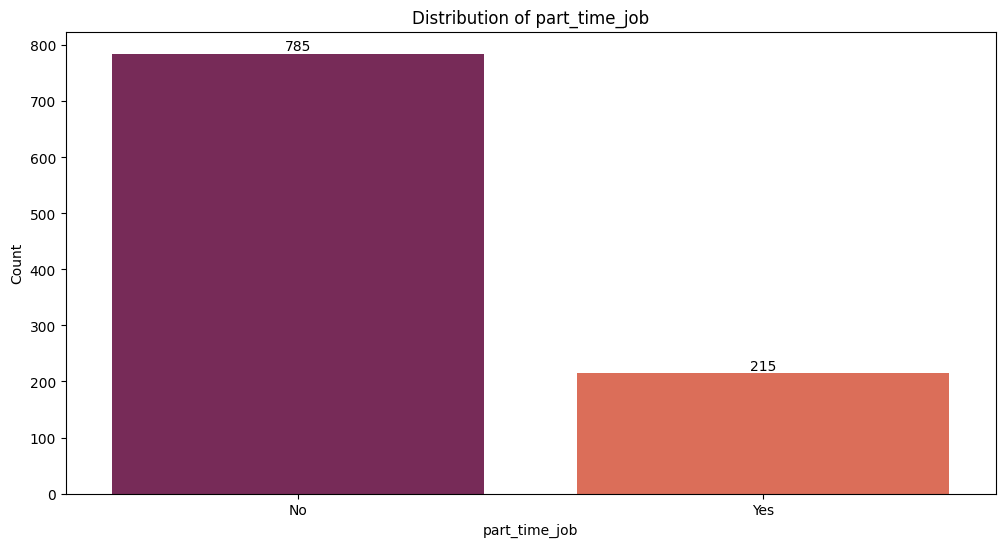

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\3069629364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="rocket")


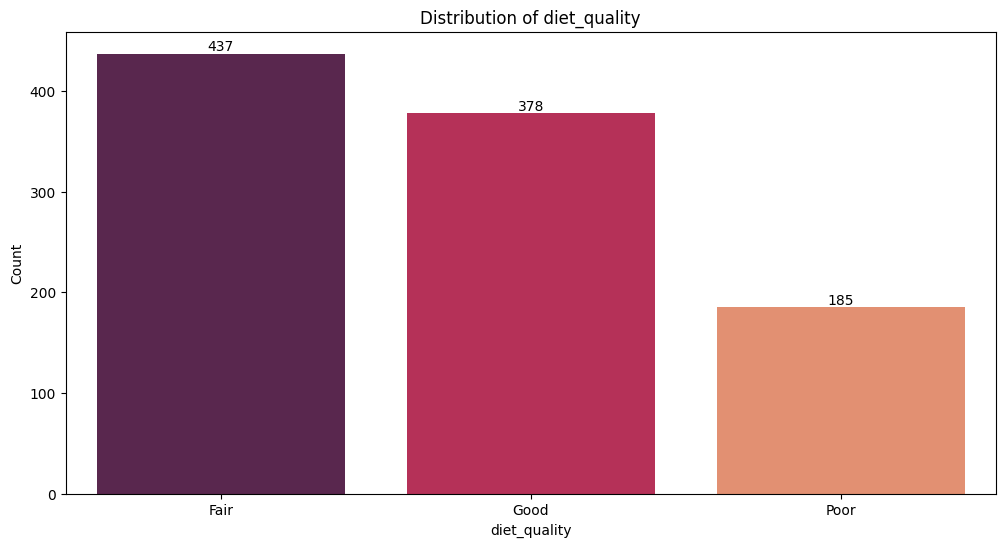

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\3069629364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="rocket")


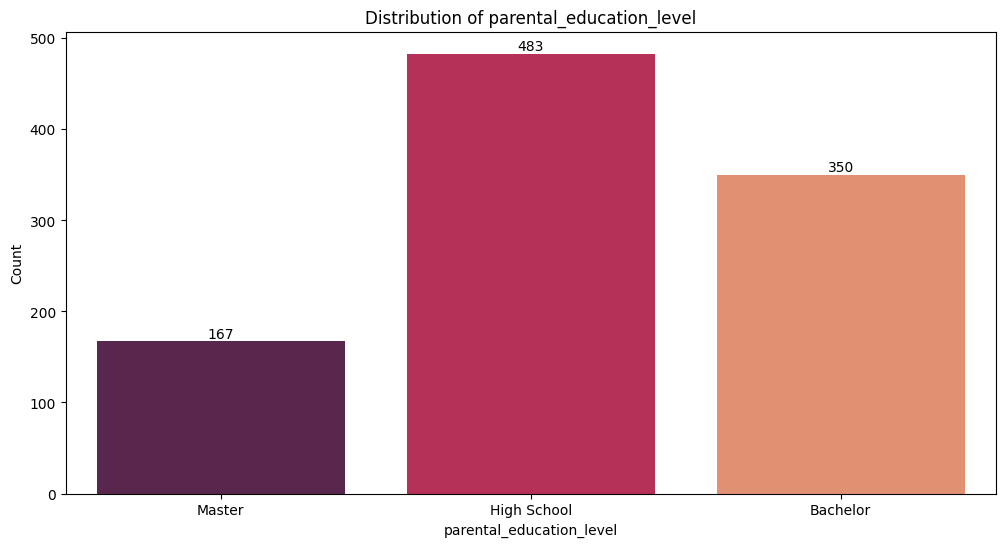

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\3069629364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="rocket")


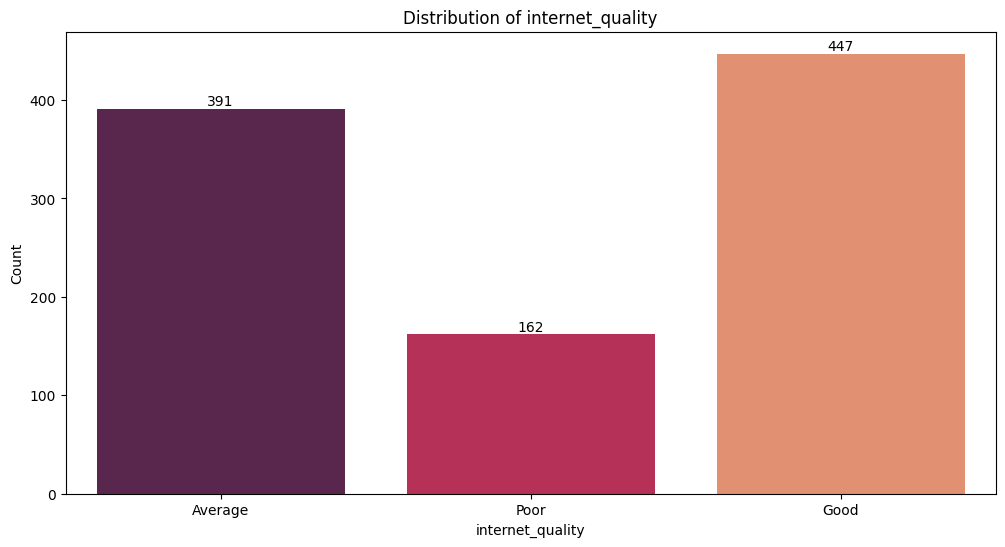

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\3069629364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="rocket")


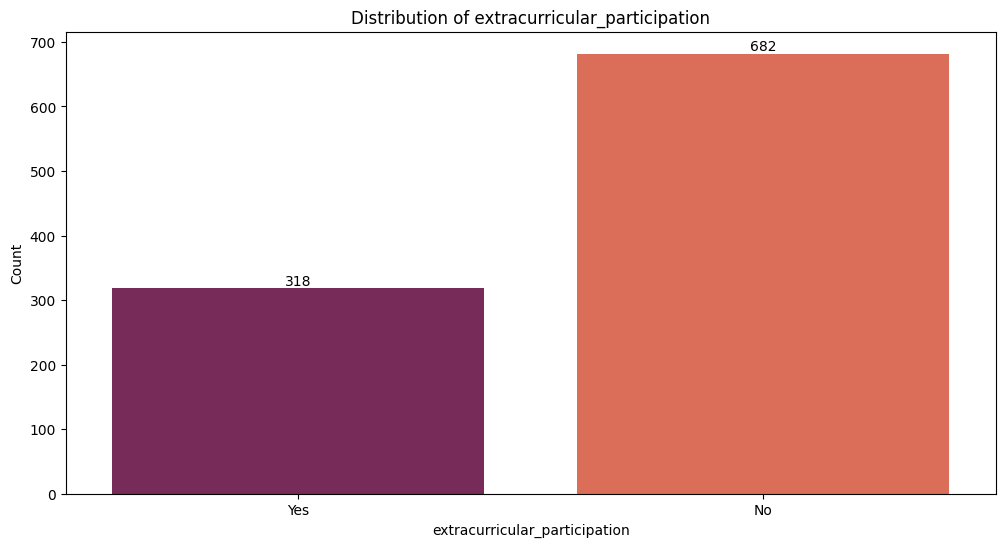

In [14]:
for col in cat_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df, x=col, palette="rocket")
    for p in plt.gca().patches:
        plt.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width()/2., p.get_height()), 
                    ha='center', va='bottom')
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.show()

# Distribution Analysis Summary

## Categorical Variables
- **Gender**: Predominantly female students in the dataset
- **Part-time Job**: Majority of students don't work part-time
- **Diet Quality**: Fairly balanced distribution across Poor, Fair, and Good categories
- **Parental Education**: Most common level is High School, followed by Bachelor and Master degrees
- **Internet Quality**: Most students report Average to Good internet connectivity
- **Extracurricular Participation**: Almost even split between participants and non-participants

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\834151774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


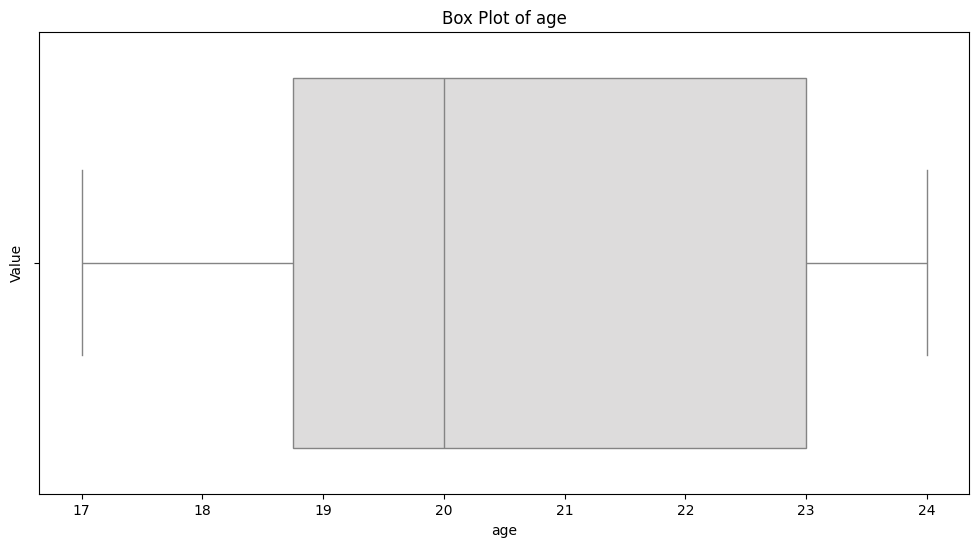

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\834151774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


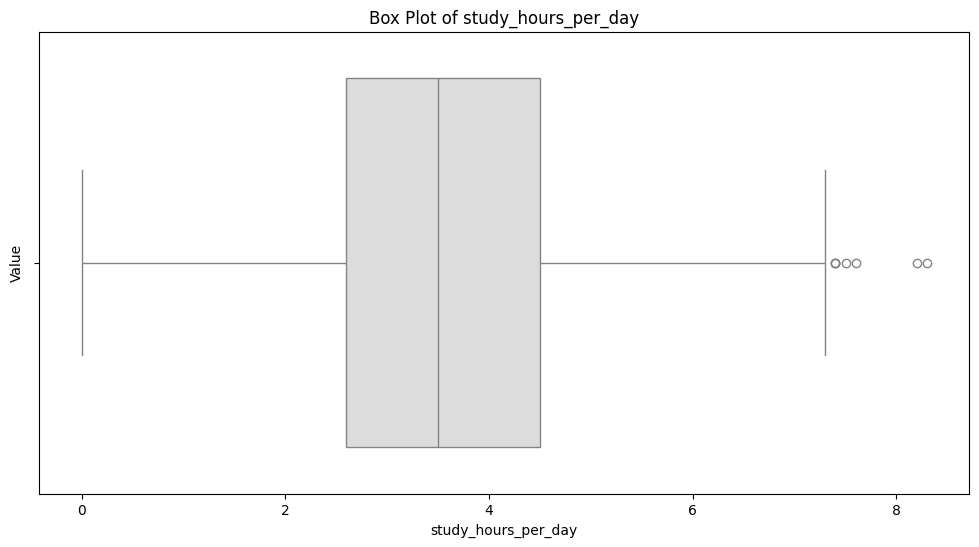

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\834151774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


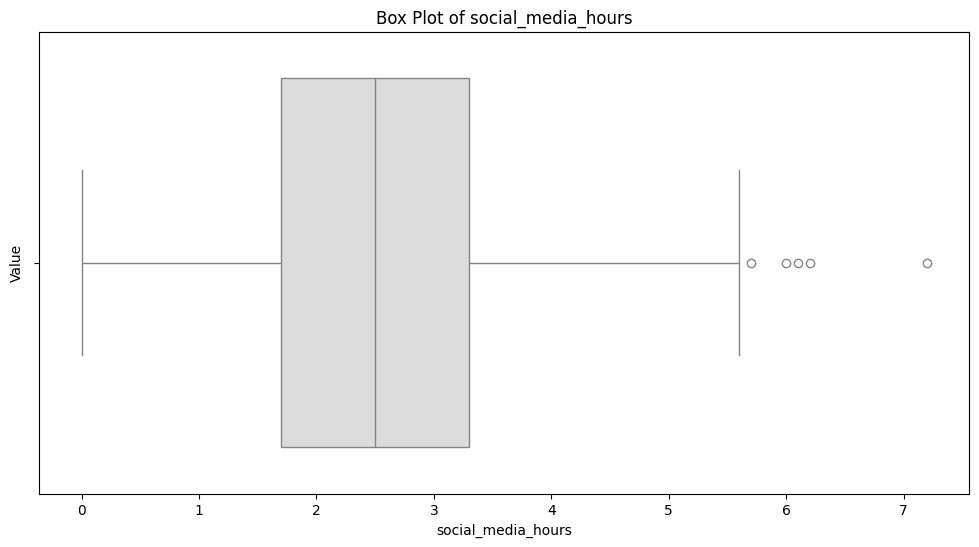

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\834151774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


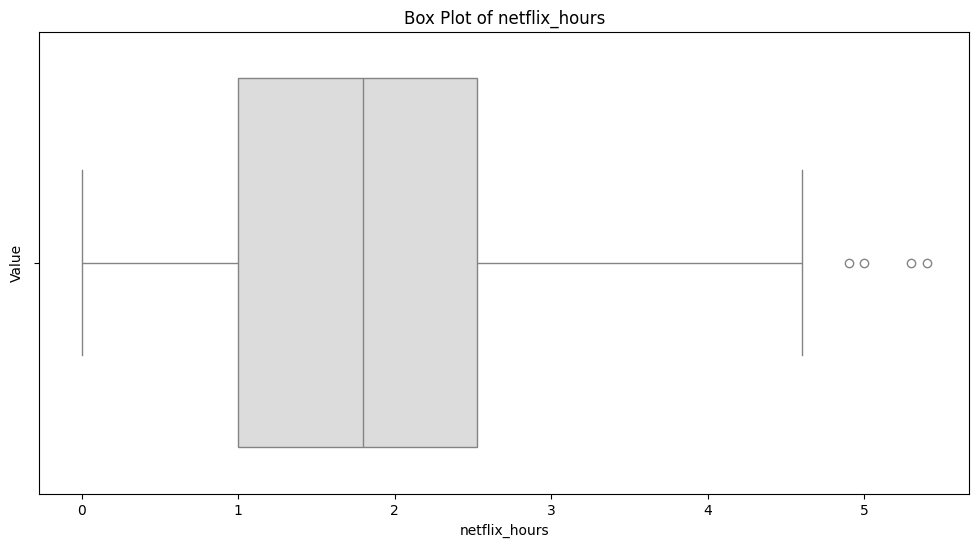

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\834151774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


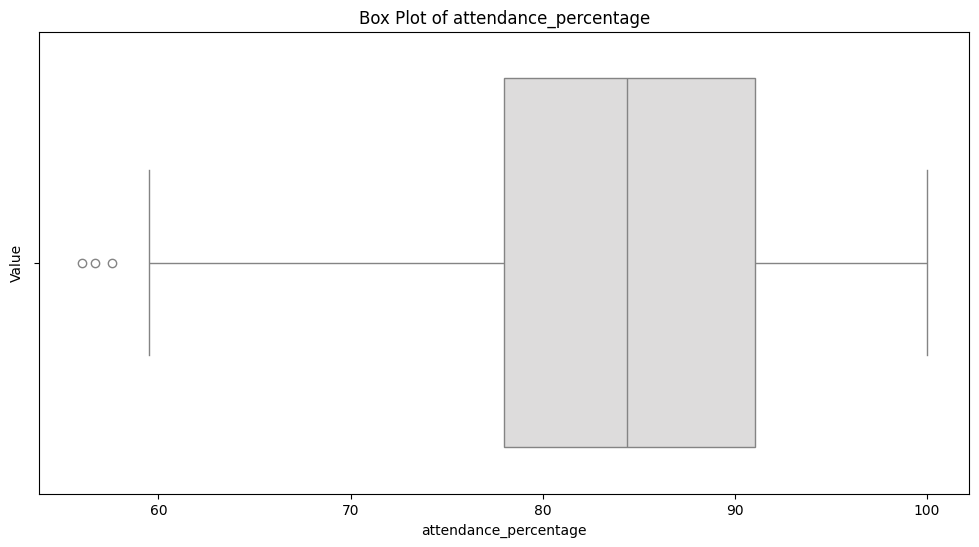

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\834151774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


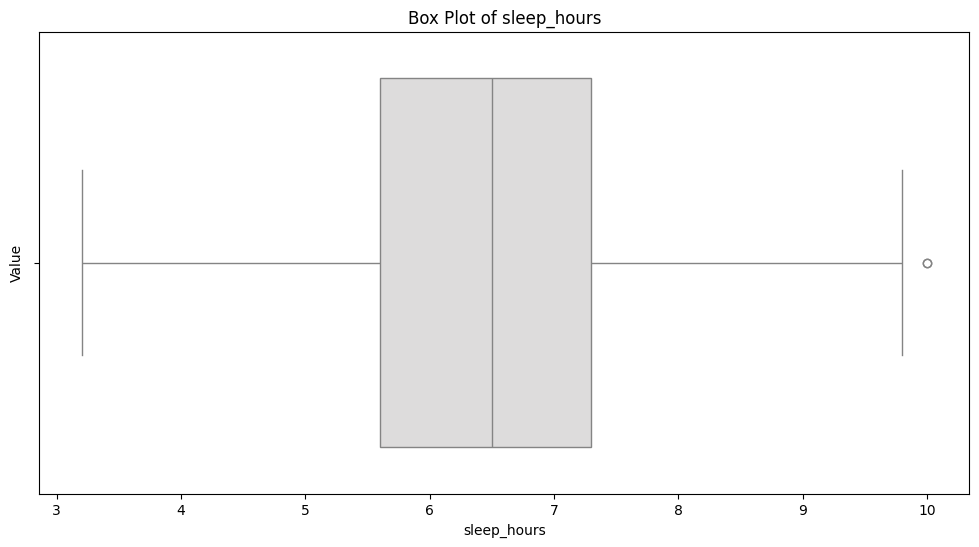

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\834151774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


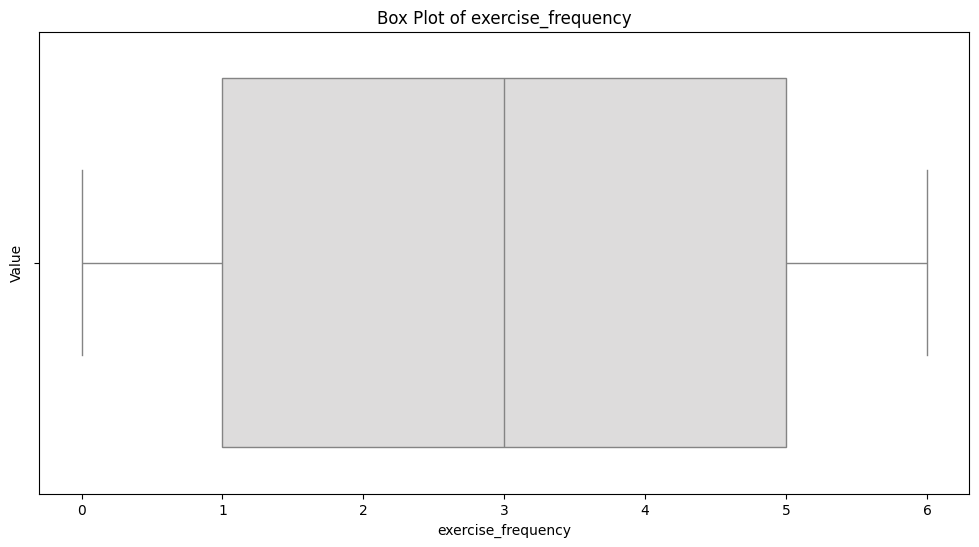

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\834151774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


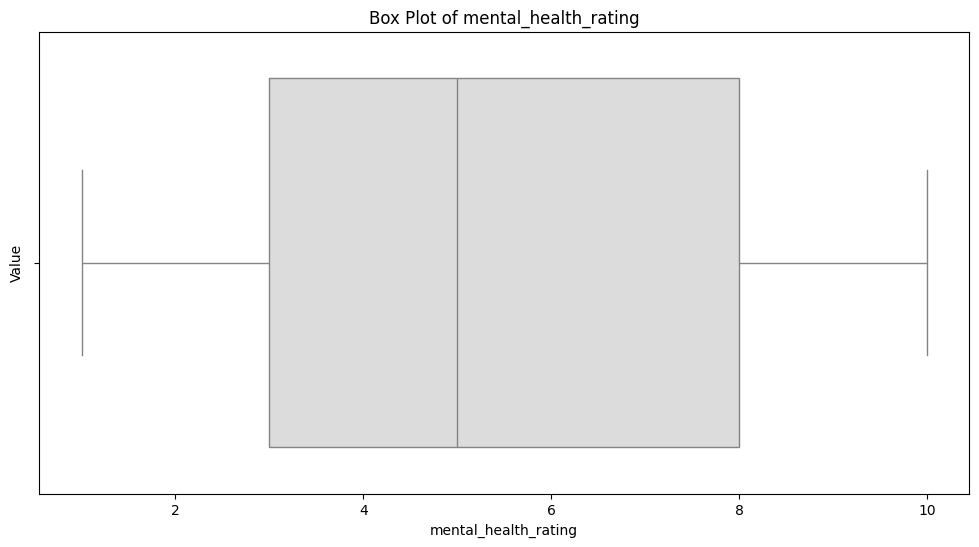

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\834151774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


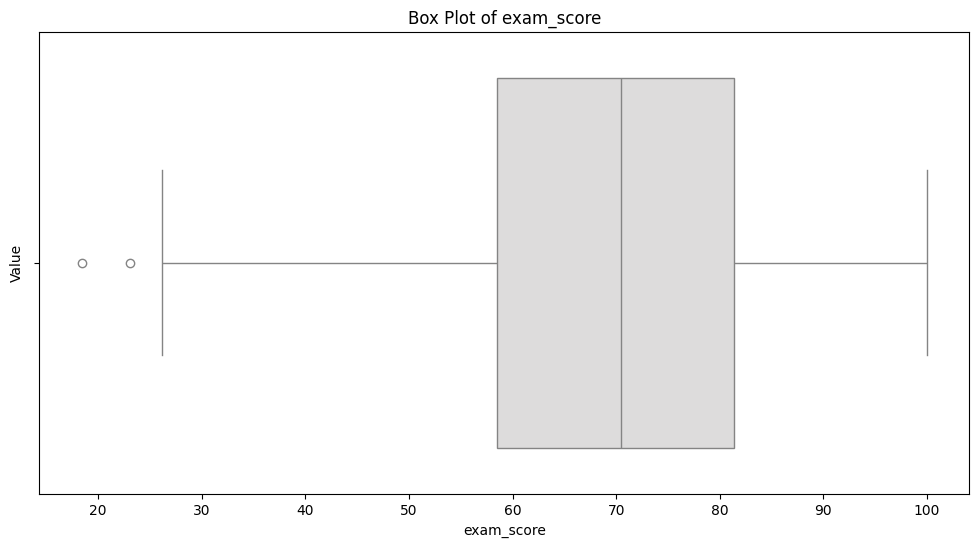

In [15]:
for col in num_cols:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x=col, palette="coolwarm")
    plt.title(f"Box Plot of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Value")
    plt.show()

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\744366135.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="coolwarm")


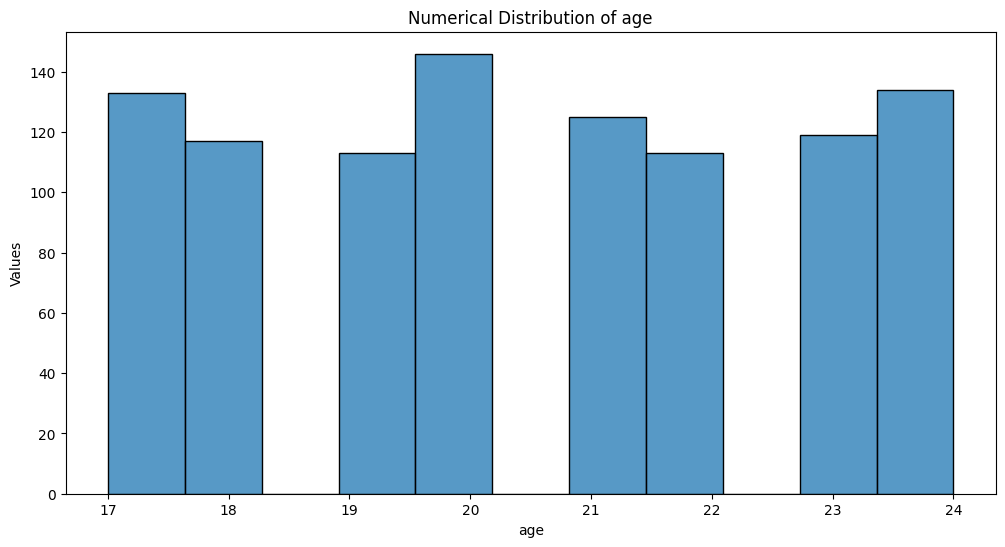

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\744366135.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="coolwarm")


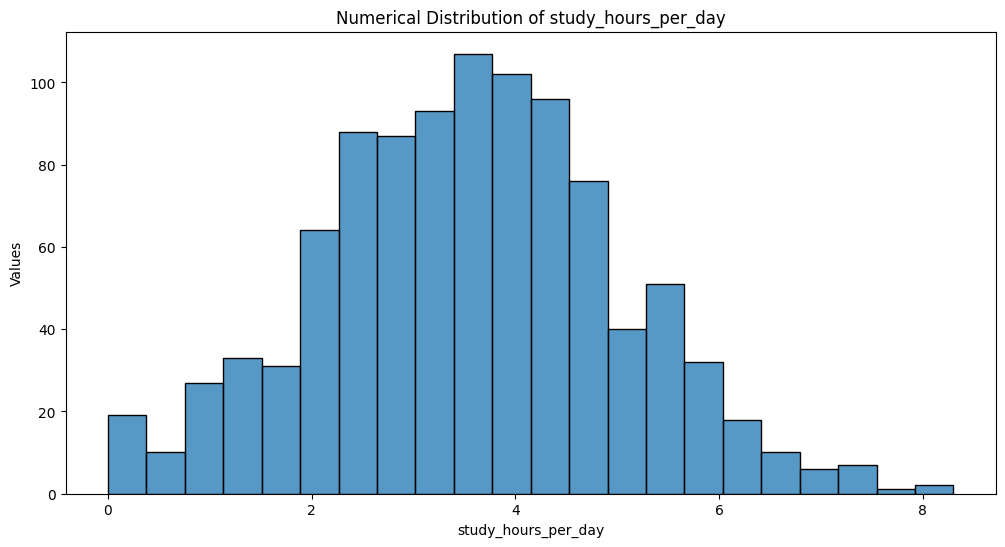

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\744366135.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="coolwarm")


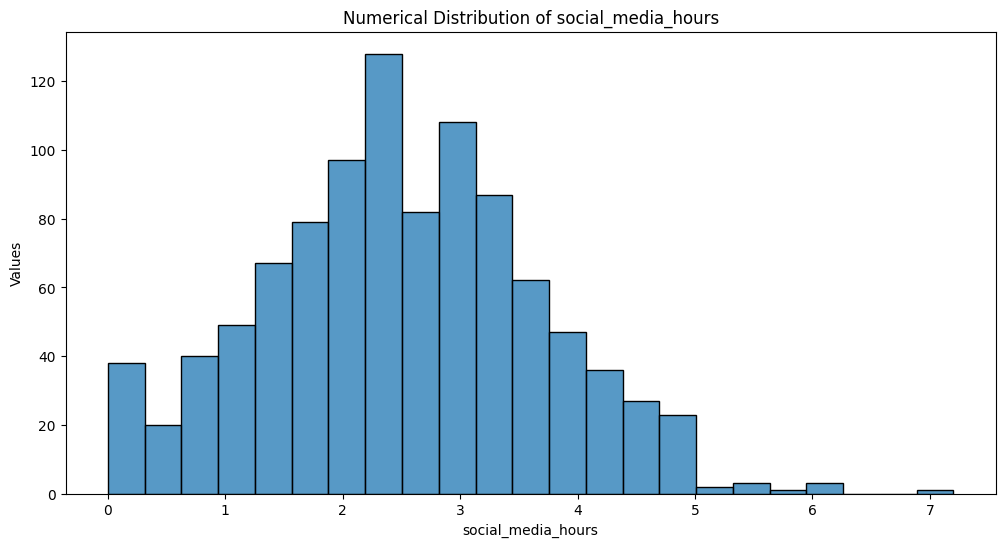

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\744366135.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="coolwarm")


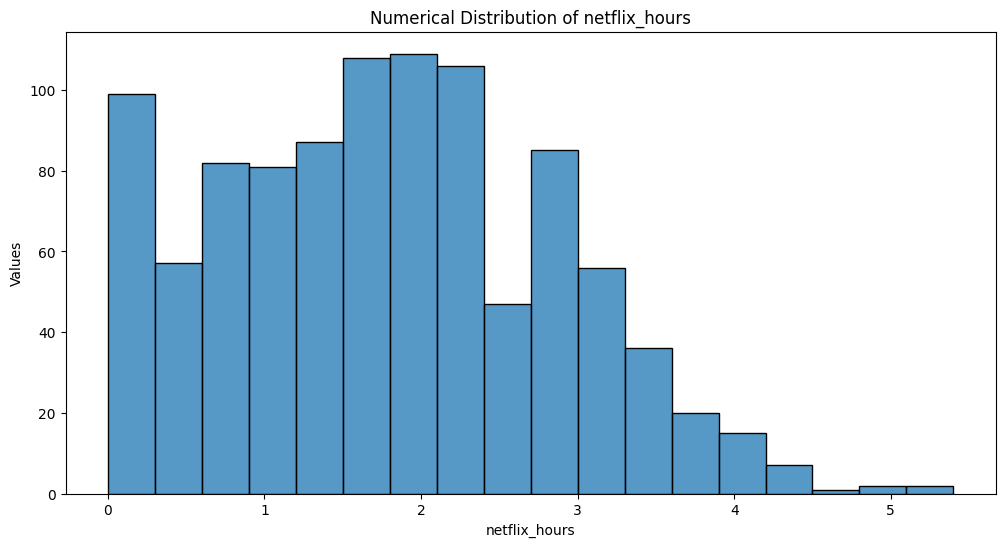

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\744366135.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="coolwarm")


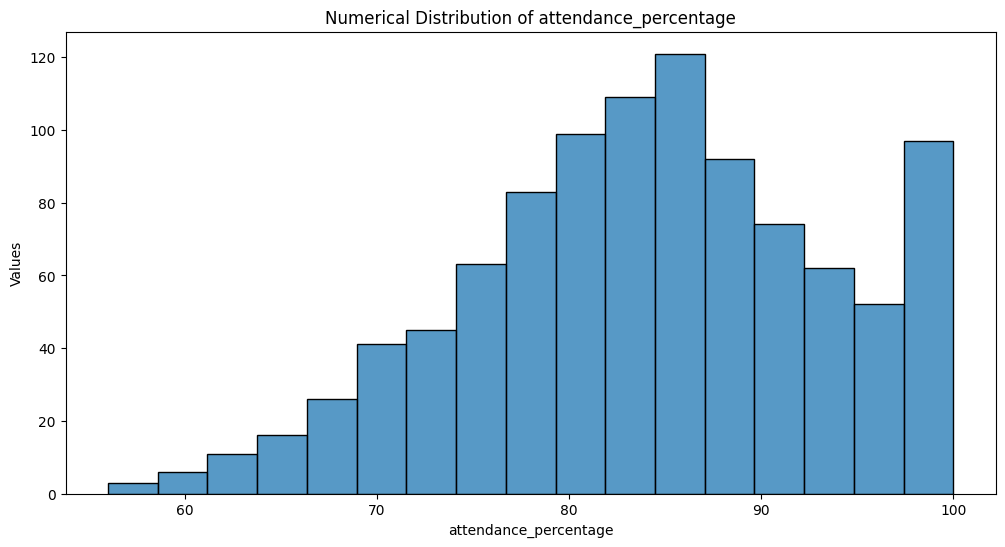

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\744366135.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="coolwarm")


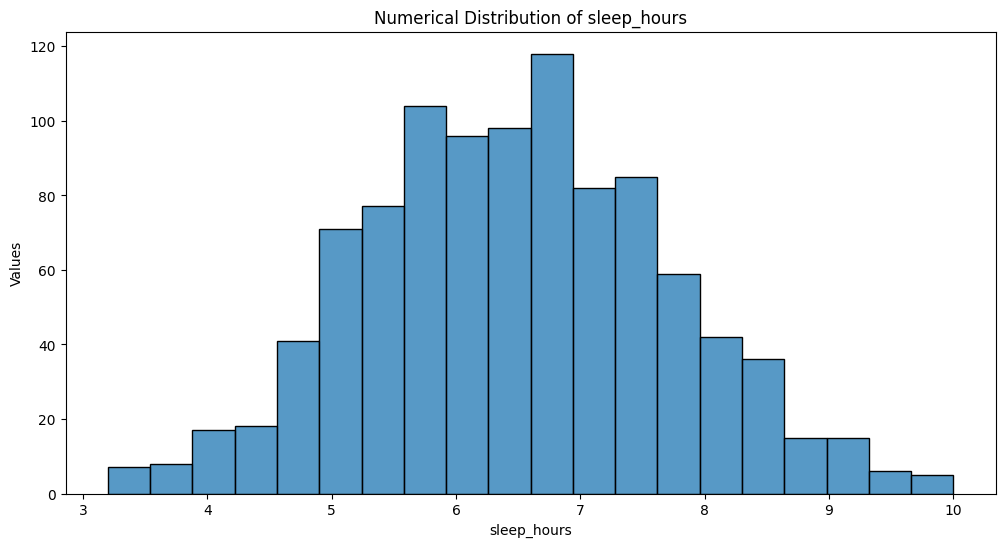

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\744366135.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="coolwarm")


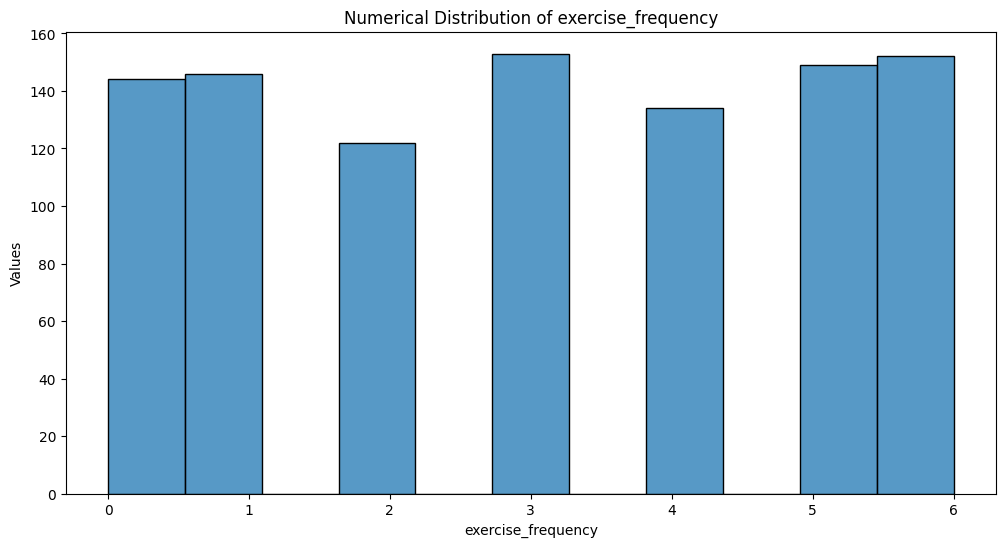

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\744366135.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="coolwarm")


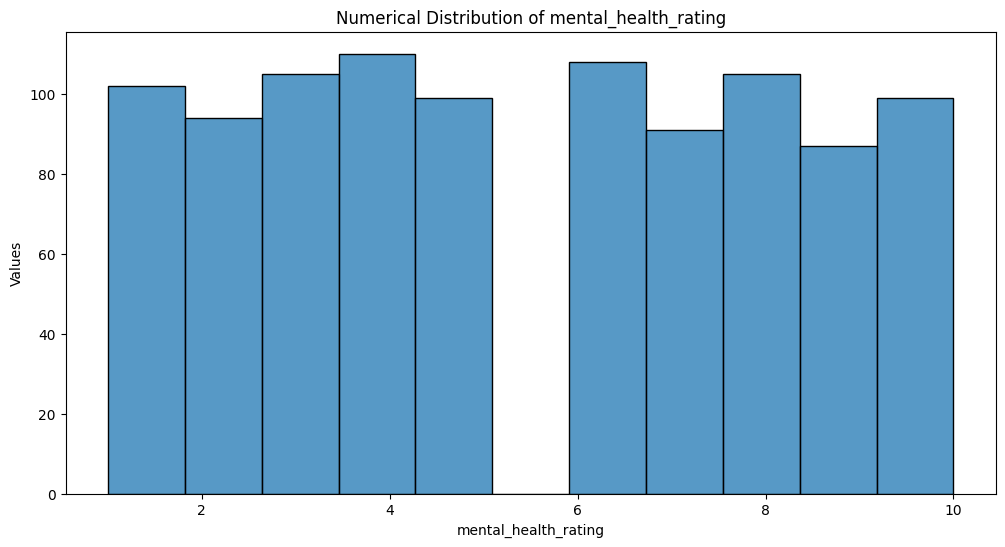

C:\Users\manik\AppData\Local\Temp\ipykernel_15400\744366135.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="coolwarm")


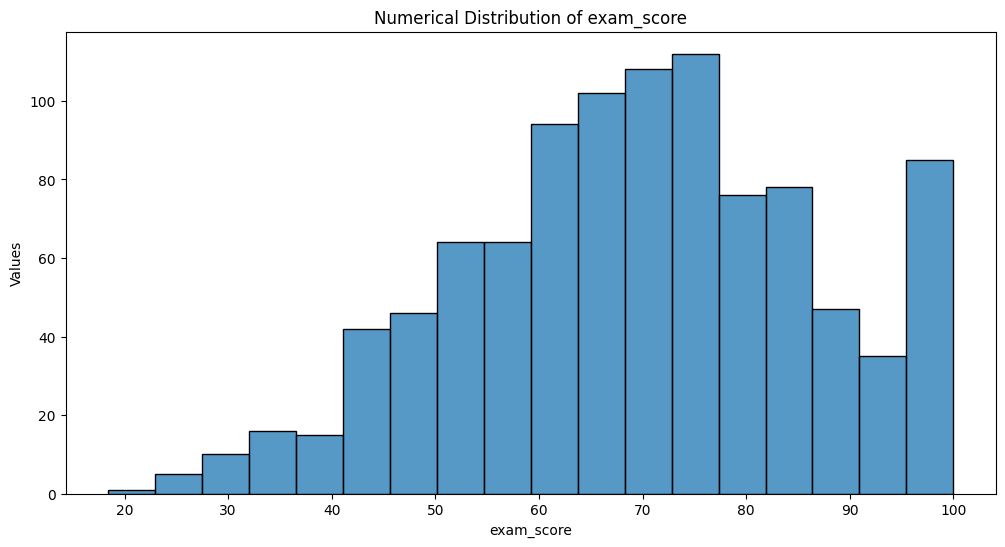

In [16]:
for col in num_cols:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df, x=col, palette="coolwarm")
    # for p in plt.gca().patches:
    #     plt.annotate(f'{int(p.get_height())}', 
    #                 (p.get_x() + p.get_width()/2., p.get_height()), 
    #                 ha='center', va='bottom')
    plt.title(f"Numerical Distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Values")
    plt.show()

# Distribution Analysis Summary

## Numerical Variables
- **Age**: Concentrated between 19-23 years, with few outliers
- **Study Hours**: Right-skewed distribution, majority study less than 4 hours/day
- **Social Media & Netflix**: Most students spend moderate time (1-3 hours) on these platforms
- **Attendance**: Left-skewed distribution, generally high attendance rates (>80%)
- **Sleep Hours**: Normal distribution centered around 7 hours
- **Exercise Frequency**: Right-skewed, most students exercise 2-4 times/week
- **Mental Health Rating**: Varied distribution across 1-10 scale
- **Exam Score**: Roughly normal distribution, centered around 65-75 marks

## Bivariate Analysis

<Figure size 1500x1000 with 0 Axes>

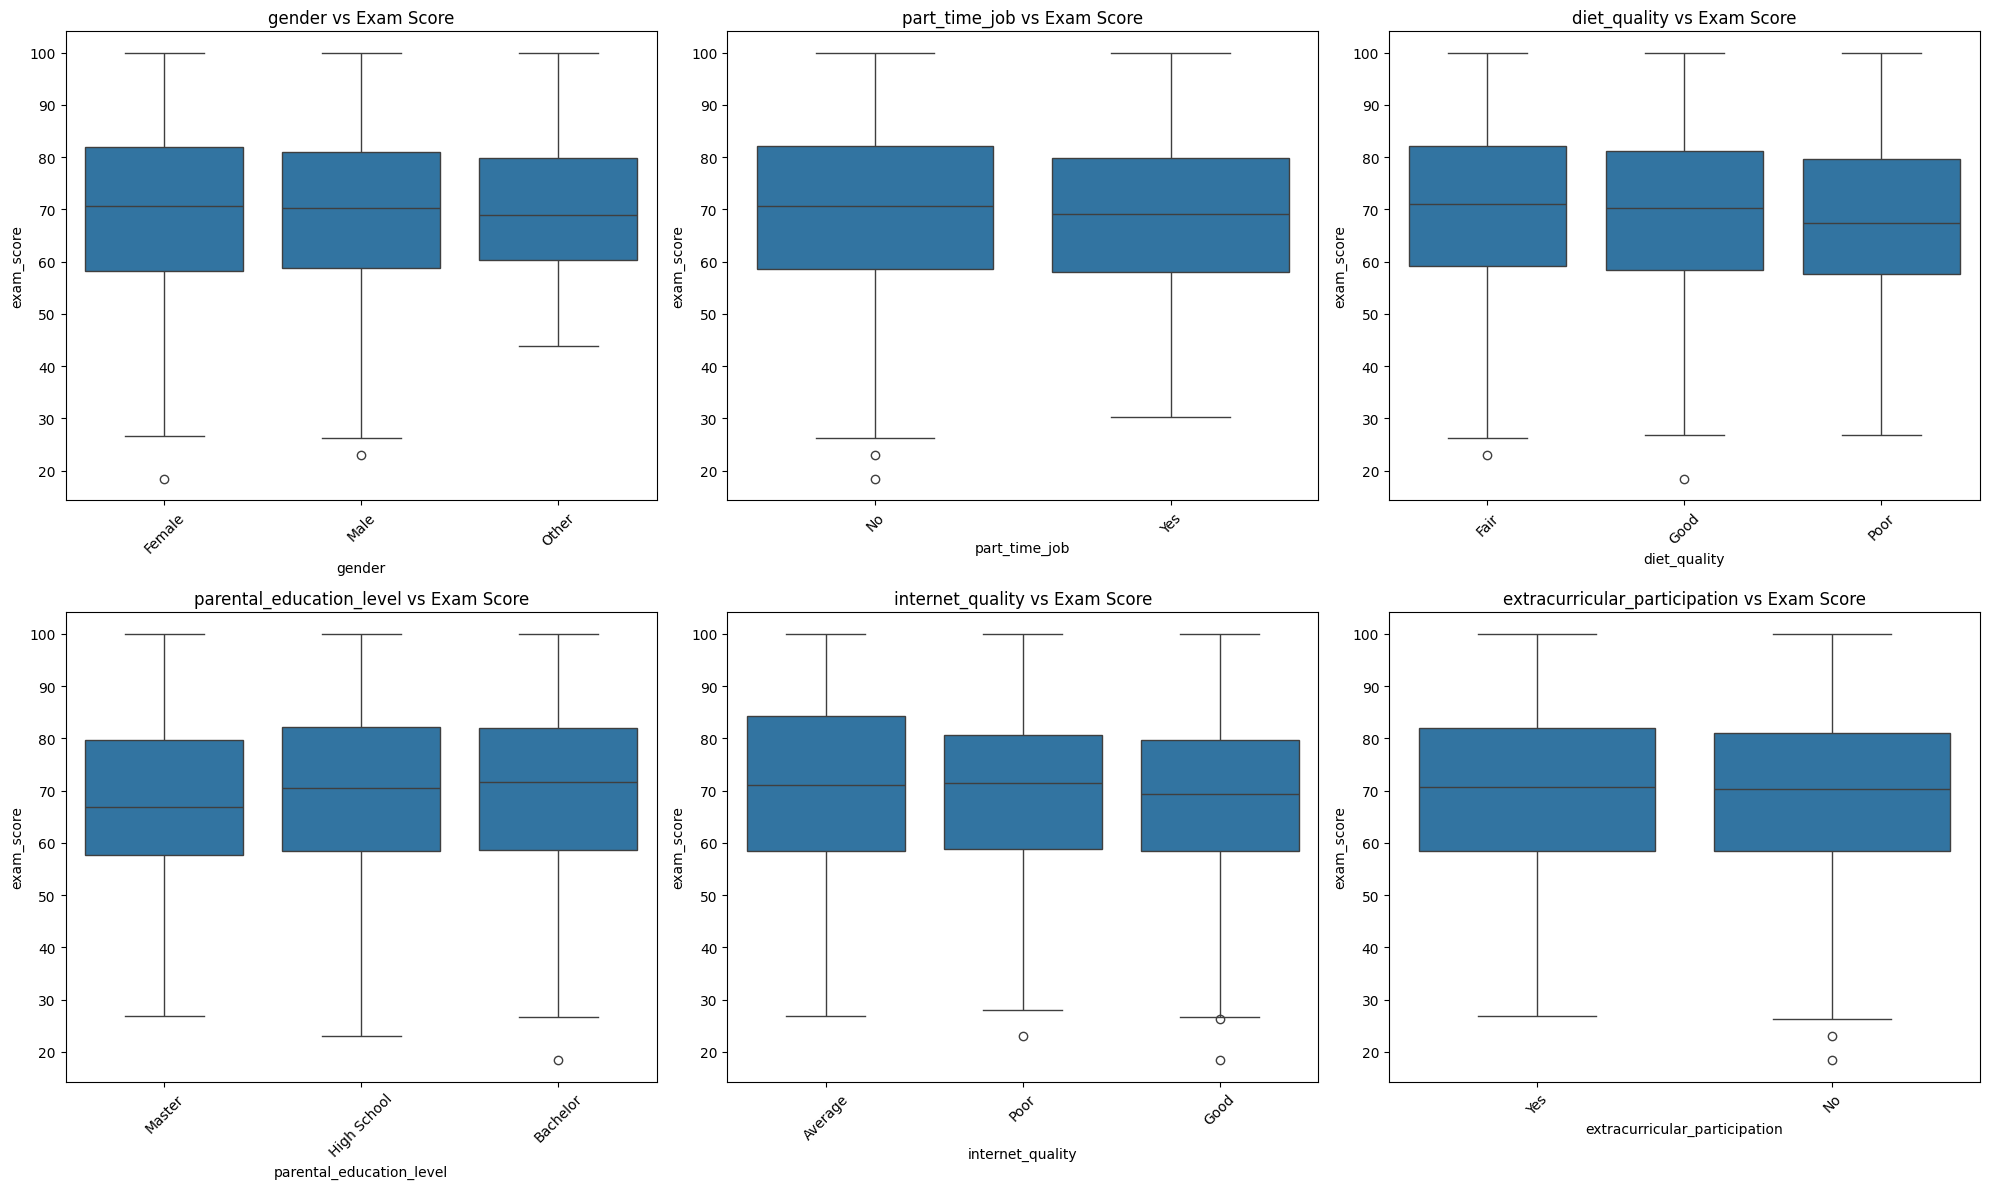

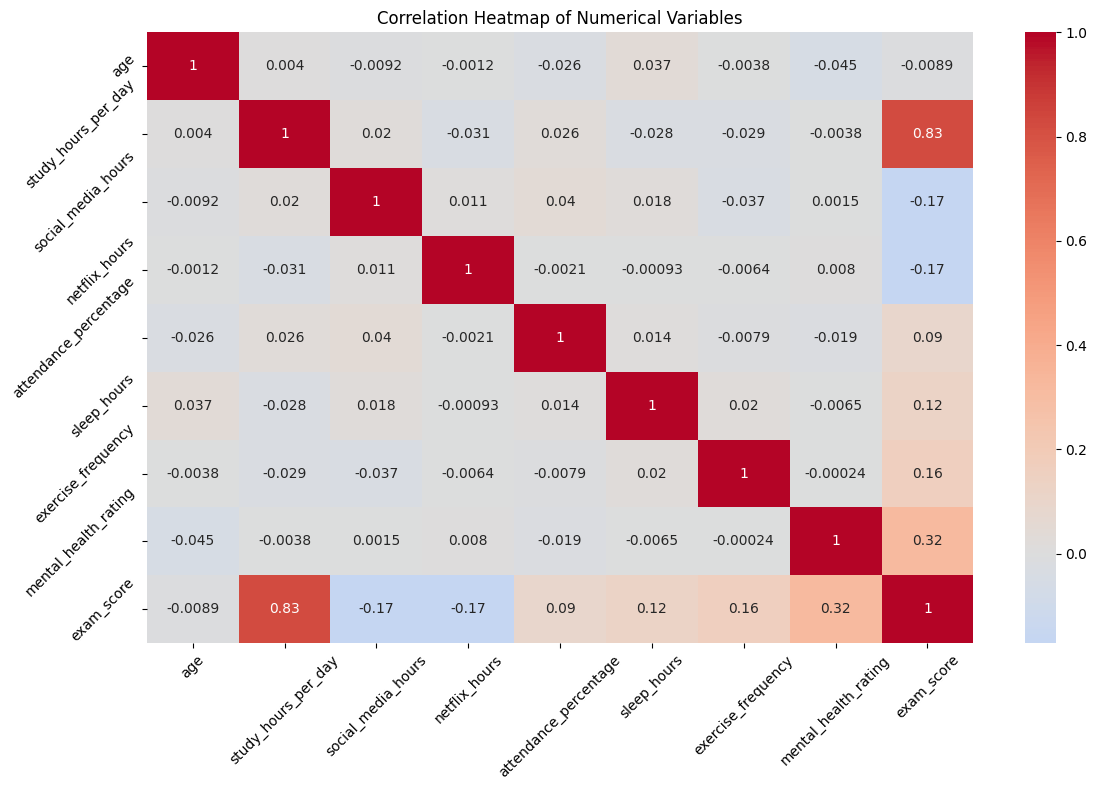

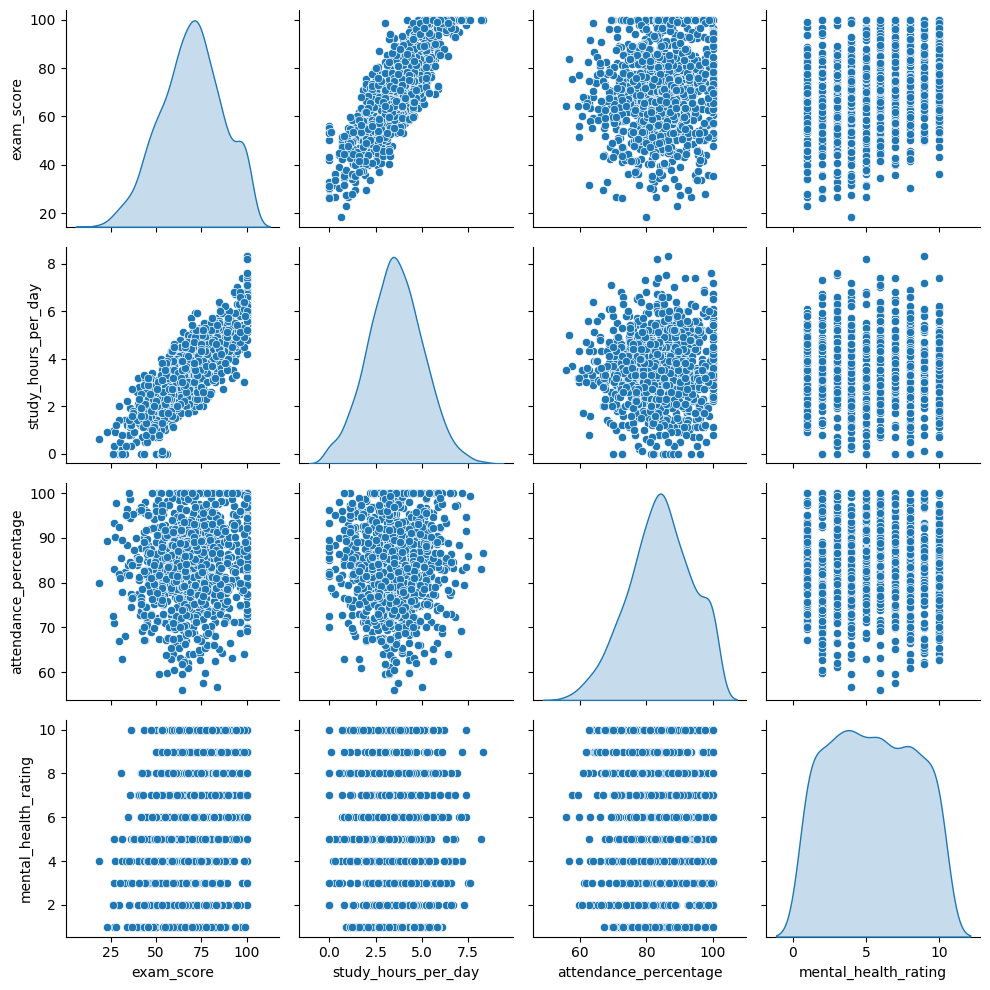

In [17]:
# Set up the figure size for better visualization
plt.figure(figsize=(15, 10))

# Create subplots for categorical variables vs exam score
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Plot boxplots for each categorical variable vs exam score
for idx, cat_var in enumerate(cat_cols):
    sns.boxplot(data=df, x=cat_var, y='exam_score', ax=axes[idx])
    axes[idx].set_title(f'{cat_var} vs Exam Score')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Create pairplot for key numerical variables
key_vars = ['exam_score', 'study_hours_per_day', 'attendance_percentage', 'mental_health_rating']
sns.pairplot(df[key_vars], diag_kind='kde')
plt.tight_layout()
plt.show()

In [18]:
# correaltion matrix 
correlation_mat = df[num_cols].corr()['exam_score'].sort_values(ascending=False)
print("Correlations with Exam Score:")
print(correlation_mat)

Correlations with Exam Score:
exam_score               1.000000
study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
age                     -0.008907
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64


## Encoding & Scaling

In [19]:
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [20]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [21]:
#Drop unwanted columns
# We have no use with Student id
# Other columns which we've dropped have negative correlation

clean_df = df.copy()
clean_df.drop(columns=['student_id','age','social_media_hours','netflix_hours'],axis=1,inplace=True)

In [22]:
clean_df.head(10)

,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,Female,0.0,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,Female,6.9,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,Male,1.4,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,Female,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,Female,5.0,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,Male,7.2,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,Female,5.6,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,Female,4.3,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,Female,4.4,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,Female,4.8,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [23]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         1000 non-null   object 
 1   study_hours_per_day            1000 non-null   float64
 2   part_time_job                  1000 non-null   object 
 3   attendance_percentage          1000 non-null   float64
 4   sleep_hours                    1000 non-null   float64
 5   diet_quality                   1000 non-null   object 
 6   exercise_frequency             1000 non-null   int64  
 7   parental_education_level       1000 non-null   object 
 8   internet_quality               1000 non-null   object 
 9   mental_health_rating           1000 non-null   int64  
 10  extracurricular_participation  1000 non-null   object 
 11  exam_score                     1000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 

In [24]:
print(clean_df['gender'].value_counts())
print(clean_df['part_time_job'].value_counts())
print(clean_df['diet_quality'].value_counts())
print(clean_df['parental_education_level'].value_counts())
print(clean_df['internet_quality'].value_counts())
print(clean_df['extracurricular_participation'].value_counts())

gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
part_time_job
No     785
Yes    215
Name: count, dtype: int64
diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64
parental_education_level
High School    483
Bachelor       350
Master         167
Name: count, dtype: int64
internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64
extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64


In [25]:
X = clean_df.drop(columns='exam_score',axis=1)
y = clean_df['exam_score']

X_cat = X.select_dtypes(include=['object']).columns.to_list()
X_num = X.select_dtypes(include=['int64','float64']).columns.to_list()




In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
# Fit and transform the categorical columns
encoded_columns = ohe.fit_transform(X[X_cat])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(X_cat))

# Drop the original categorical columns and concatenate the new encoded columns
X = X.drop(X_cat, axis=1)  # Drop original categorical columns
X = pd.concat([X, encoded_df], axis=1)  # Concatenate the new columns

# Now X contains the one-hot encoded columns

In [27]:
X.head(10)

,study_hours_per_day,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,gender_Female,gender_Male,gender_Other,part_time_job_No,part_time_job_Yes,...,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,internet_quality_Average,internet_quality_Good,internet_quality_Poor,extracurricular_participation_No,extracurricular_participation_Yes
0,0.0,85.0,8.0,6,8,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,6.9,97.3,4.6,6,8,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.4,94.8,8.0,1,1,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,71.0,9.2,4,1,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,5.0,90.9,4.9,3,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,7.2,82.9,7.4,1,4,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,5.6,85.8,6.5,2,4,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,4.3,77.7,4.6,0,8,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,4.4,100.0,7.1,3,1,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,4.8,95.4,7.5,5,10,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [28]:
from sklearn.preprocessing import MinMaxScaler

# Min-max Scaling
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale only the numerical columns
X[X_num] = scaler.fit_transform(X[X_num])

In [29]:
X.shape

(1000, 21)

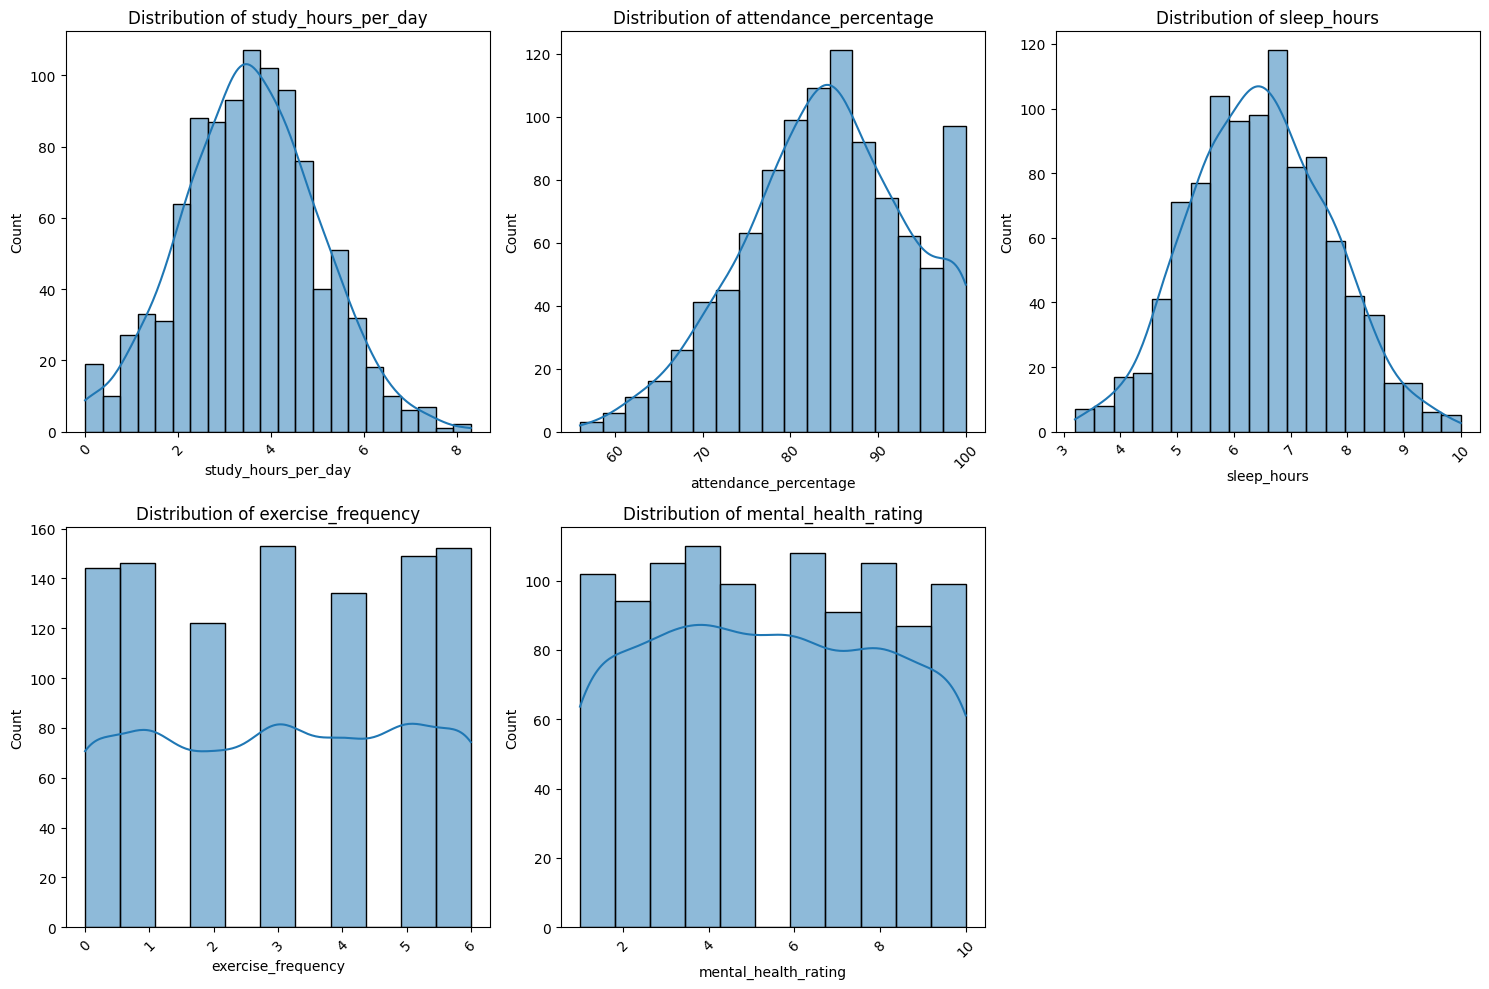

In [30]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(X_num, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

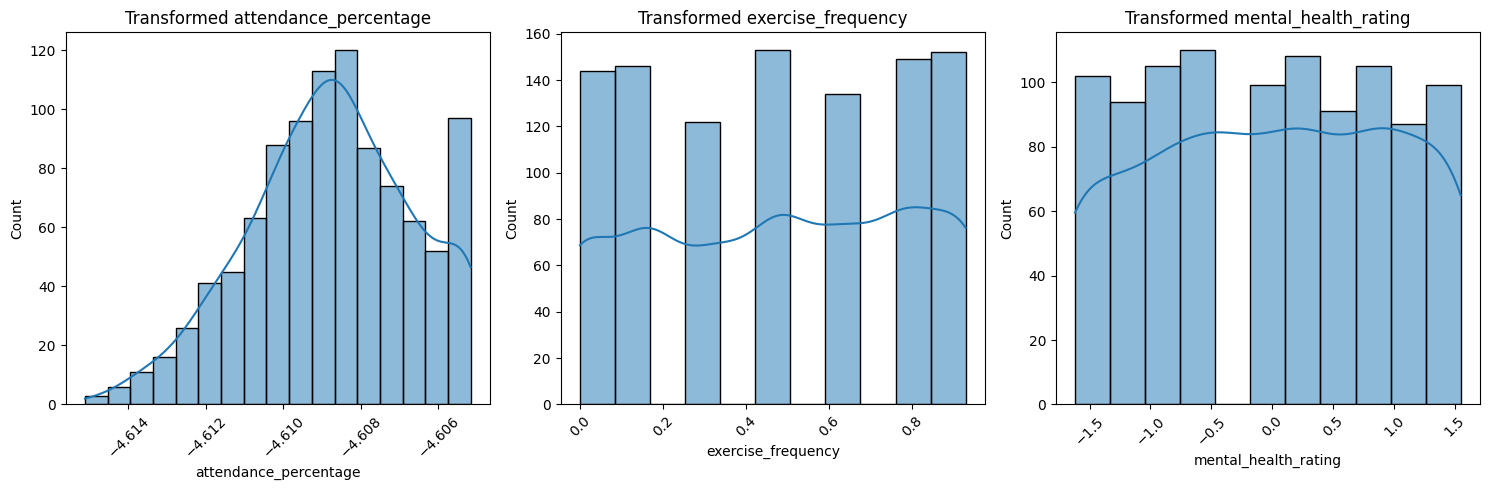

In [31]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Create a copy of X for transformation
X_transformed = X.copy()

# 1. For attendance_percentage (left-skewed)
# Using reflected log transformation since it's left-skewed
X_transformed['attendance_percentage'] = -np.log(101 - X['attendance_percentage'])

# 2. For exercise_frequency (right-skewed)
# Using Box-Cox transformation
X_transformed['exercise_frequency'], _ = boxcox(X['exercise_frequency'] + 1)  # Adding 1 to handle zero values

# 3. For mental_health_rating
# Using Yeo-Johnson transformation which works well with both positive and negative values
pt = PowerTransformer(method='yeo-johnson')
X_transformed['mental_health_rating'] = pt.fit_transform(X[['mental_health_rating']])

# Visualize the transformed distributions
plt.figure(figsize=(15, 5))
for i, col in enumerate(['attendance_percentage', 'exercise_frequency', 'mental_health_rating']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=X_transformed[col], kde=True)
    plt.title(f'Transformed {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
X_transformed.head(10)

,study_hours_per_day,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,gender_Female,gender_Male,gender_Other,part_time_job_No,part_time_job_Yes,...,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,internet_quality_Average,internet_quality_Good,internet_quality_Poor,extracurricular_participation_No,extracurricular_participation_Yes
0,0.000000,-4.608573,0.705882,0.928452,0.905047,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.831325,-4.605784,0.205882,0.928452,0.905047,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.168675,-4.606351,0.705882,0.164135,-1.619833,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.120482,-4.611739,0.882353,0.632019,-1.619833,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.602410,-4.607236,0.250000,0.479558,-1.619833,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.867470,-4.609049,0.617647,0.164135,-0.474328,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.674699,-4.608392,0.485294,0.323765,-0.474328,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,0.518072,-4.610226,0.205882,0.000000,0.905047,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.530120,-4.605170,0.573529,0.479558,-1.619833,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.578313,-4.606215,0.632353,0.781545,1.548019,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [33]:
# Updating X with transformed features
X[['attendance_percentage', 'exercise_frequency', 'mental_health_rating']] = \
    X_transformed[['attendance_percentage', 'exercise_frequency', 'mental_health_rating']]


In [34]:
X.head(10)

,study_hours_per_day,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,gender_Female,gender_Male,gender_Other,part_time_job_No,part_time_job_Yes,...,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,internet_quality_Average,internet_quality_Good,internet_quality_Poor,extracurricular_participation_No,extracurricular_participation_Yes
0,0.000000,-4.608573,0.705882,0.928452,0.905047,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.831325,-4.605784,0.205882,0.928452,0.905047,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.168675,-4.606351,0.705882,0.164135,-1.619833,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.120482,-4.611739,0.882353,0.632019,-1.619833,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.602410,-4.607236,0.250000,0.479558,-1.619833,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.867470,-4.609049,0.617647,0.164135,-0.474328,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.674699,-4.608392,0.485294,0.323765,-0.474328,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,0.518072,-4.610226,0.205882,0.000000,0.905047,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.530120,-4.605170,0.573529,0.479558,-1.619833,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.578313,-4.606215,0.632353,0.781545,1.548019,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [35]:
# correaltion matrix 
corr_df = pd.concat([X,y],axis = 1)
correlation_mat = corr_df.corr()['exam_score'].sort_values(ascending=False)
print(correlation_mat)

exam_score                              1.000000
study_hours_per_day                     0.825419
mental_health_rating                    0.320499
exercise_frequency                      0.159422
sleep_hours                             0.121683
attendance_percentage                   0.089882
internet_quality_Average                0.049485
diet_quality_Fair                       0.043181
parental_education_level_Bachelor       0.029172
part_time_job_No                        0.026608
gender_Other                            0.012976
gender_Female                           0.007977
internet_quality_Poor                   0.003016
parental_education_level_High School    0.002143
extracurricular_participation_Yes       0.000881
extracurricular_participation_No       -0.000881
diet_quality_Good                      -0.010857
gender_Male                            -0.013191
part_time_job_Yes                      -0.026608
parental_education_level_Master        -0.040177
diet_quality_Poor   

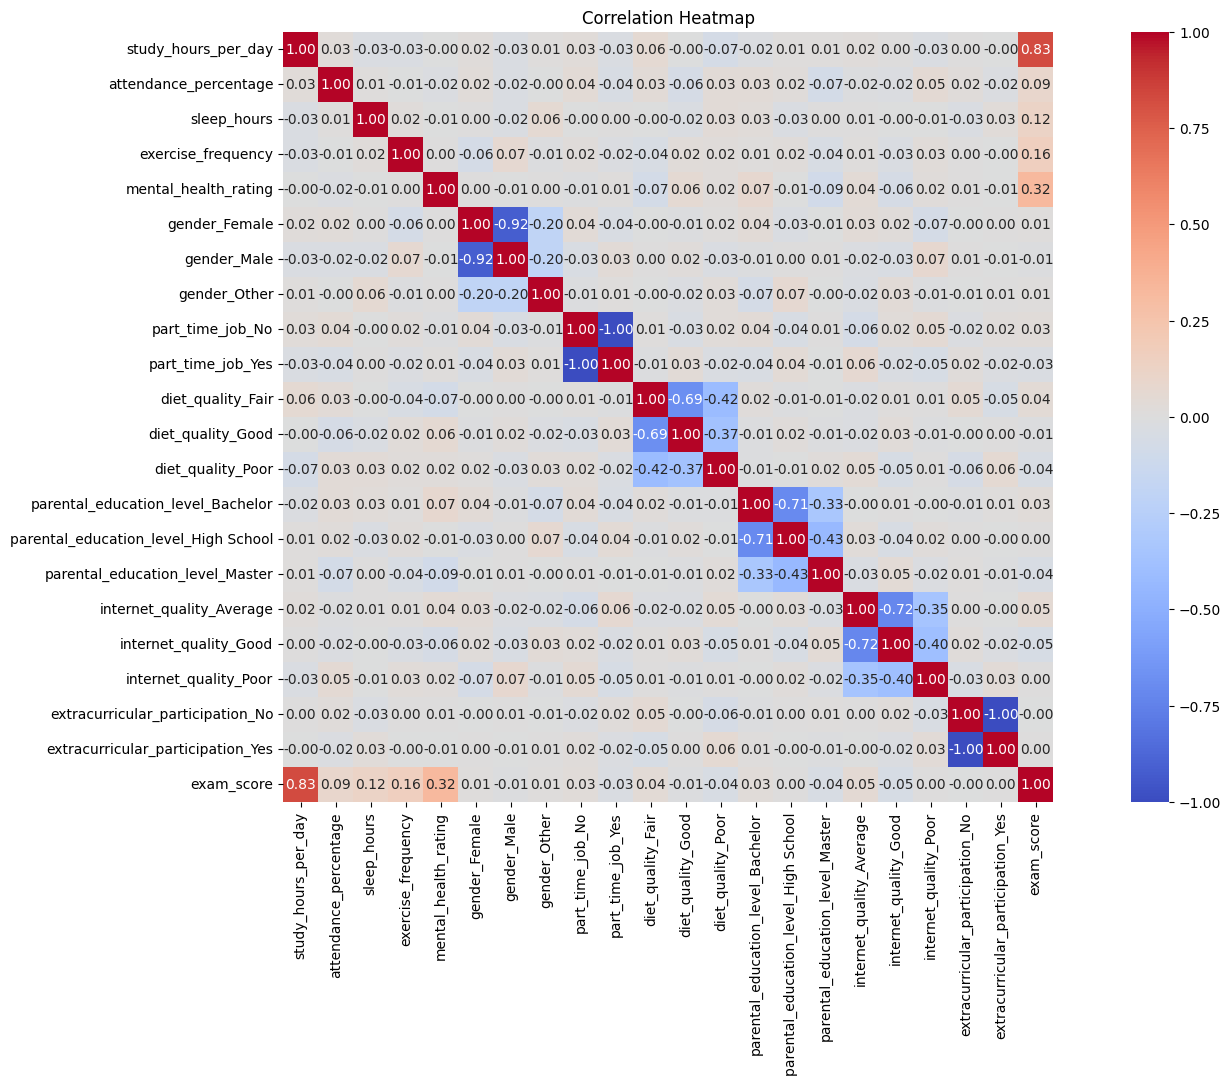

In [36]:
# correaltion matrix 
corr_df = pd.concat([X,y],axis = 1)
correlation_mat = corr_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data=correlation_mat,cmap='coolwarm',annot=True, fmt='.2f', square=True)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

In [37]:
# Drop the columns which have negative correlation 
correlation_mat = corr_df.corr()

# Get correlations with 'exam_score' and filter for negative values
negative_corr = correlation_mat['exam_score'][correlation_mat['exam_score'] < 0]

# Get the list of columns to drop
columns_to_drop = negative_corr.index
print(columns_to_drop)

X = X.drop(columns=columns_to_drop)

Index(['gender_Male', 'part_time_job_Yes', 'diet_quality_Good',
       'diet_quality_Poor', 'parental_education_level_Master',
       'internet_quality_Good', 'extracurricular_participation_No'],
      dtype='object')


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   study_hours_per_day                   1000 non-null   float64
 1   attendance_percentage                 1000 non-null   float64
 2   sleep_hours                           1000 non-null   float64
 3   exercise_frequency                    1000 non-null   float64
 4   mental_health_rating                  1000 non-null   float64
 5   gender_Female                         1000 non-null   float64
 6   gender_Other                          1000 non-null   float64
 7   part_time_job_No                      1000 non-null   float64
 8   diet_quality_Fair                     1000 non-null   float64
 9   parental_education_level_Bachelor     1000 non-null   float64
 10  parental_education_level_High School  1000 non-null   float64
 11  internet_quality_A

## Train,Test,Split

In [41]:

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(800, 14)

In [43]:
X_test.shape

(200, 14)

## Defining Model

In [44]:
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# we'll use ridge regression,decision tree regressor, randomforest regressor,knn regressor, xgboost regressor
# Initialize models
lasso = Lasso(alpha=0.1)
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
xgb_reg = XGBRegressor(random_state=42)

# Create list of models
models = [
    ('Lasso',lasso),
    ('Linear Regression', lr),
    ('Ridge', ridge),
    ('Decision Tree', dt),
    ('Random Forest', rf),
    ('KNN', knn),
    ('XGBoost', xgb_reg)
]

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Dictionary to store results
results = {}

# Number of observations and predictors
n = X_test.shape[0]  # Number of test samples
p = X_train.shape[1]  # Number of predictors

# Train and evaluate each model
for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Calculate R²
    adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # Calculate Adjusted R²

    # Store results
    results[name] = {
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae,
        'R²': r2,  # Add R² to results
        'Adjusted R²': adjusted_r_squared  # Add Adjusted R² to results
    }

# Display results
for model_name, metrics in results.items():
    print(f"\n{model_name} Performance:")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"R²: {metrics['R²']:.2f}")  # Print R²
    print(f"Adjusted R²: {metrics['Adjusted R²']:.2f}")  # Print Adjusted R²


Lasso Performance:
RMSE: 6.25
MSE: 39.00
MAE: 5.02
R²: 0.85
Adjusted R²: 0.84

Linear Regression Performance:
RMSE: 6.07
MSE: 36.85
MAE: 4.87
R²: 0.86
Adjusted R²: 0.85

Ridge Performance:
RMSE: 6.17
MSE: 38.06
MAE: 4.97
R²: 0.85
Adjusted R²: 0.84

Decision Tree Performance:
RMSE: 9.41
MSE: 88.53
MAE: 7.63
R²: 0.65
Adjusted R²: 0.63

Random Forest Performance:
RMSE: 6.84
MSE: 46.77
MAE: 5.39
R²: 0.82
Adjusted R²: 0.80

KNN Performance:
RMSE: 15.15
MSE: 229.53
MAE: 11.90
R²: 0.10
Adjusted R²: 0.04

XGBoost Performance:
RMSE: 6.97
MSE: 48.57
MAE: 5.57
R²: 0.81
Adjusted R²: 0.80


## Hyperparameter Tuning and Cross-Validation

In [49]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define RMSE scorer
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)))

# Define cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Parameter grids for each model
param_grids = {
    'Lasso': {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'max_iter': [1000, 2000, 3000],
        'tol': [0.0001, 0.001, 0.01]
    },
    'Linear Regression': {
        'fit_intercept': [True, False]
    },
    'Ridge': {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
        'solver': ['auto', 'svd', 'cholesky']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200],
        'min_child_weight': [1, 3]
    }
}

# Dictionary to store best models and their metrics
best_models = {}

# Perform GridSearchCV for each model
for name, model in models:
    if name in param_grids:  # Only tune models in param_grids
        print(f"\nTuning {name}...")
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring=rmse_scorer,
            cv=cv,
            n_jobs=-1,
            verbose=1
        )
        
        # Fit GridSearchCV
        grid_search.fit(X_train, y_train)
        
        # Store best model
        best_models[name] = grid_search.best_estimator_
        
        # Print results
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best cross-validation RMSE: {-grid_search.best_score_:.2f}")

        # Calculate Adjusted R² for the best model
        y_pred = grid_search.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        n = X_test.shape[0]  # Number of test samples
        p = X_train.shape[1]  # Number of predictors
        adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

        print(f"Test set RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
        print(f"Adjusted R²: {adjusted_r_squared:.2f}")

# Compare final results
print("\nFinal Model Comparison:")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_train.shape[1]
    adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    print(f"{name} - Test RMSE: {rmse:.2f}, Adjusted R²: {adjusted_r_squared:.2f}")


Tuning Lasso...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'alpha': 10, 'max_iter': 1000, 'tol': 0.0001}
Best cross-validation RMSE: -17.08
Test set RMSE: 16.05
Adjusted R²: -0.08

Tuning Linear Regression...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'fit_intercept': False}
Best cross-validation RMSE: -6.94
Test set RMSE: 6.15
Adjusted R²: 0.84

Tuning Ridge...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'alpha': 10.0, 'solver': 'svd'}
Best cross-validation RMSE: -8.46
Test set RMSE: 7.34
Adjusted R²: 0.77

Tuning Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation RMSE: -7.45
Test set RMSE: 6.84
Adjusted R²: 0.80

Tuning XGBoost...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'learning_rate':

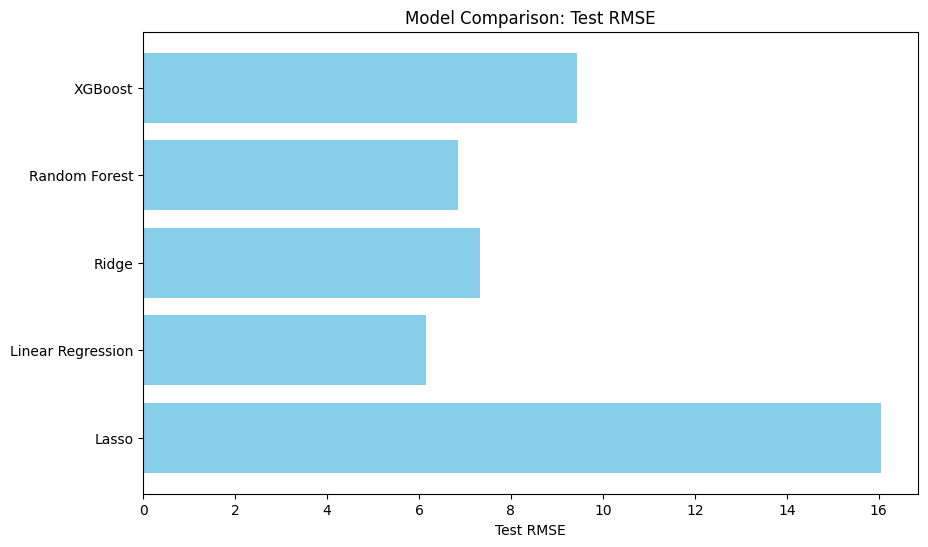

In [50]:
import matplotlib.pyplot as plt

model_names = list(best_models.keys())
rmse_values = [np.sqrt(mean_squared_error(y_test, model.predict(X_test))) for model in best_models.values()]

plt.figure(figsize=(10, 6))
plt.barh(model_names, rmse_values, color='skyblue')
plt.xlabel('Test RMSE')
plt.title('Model Comparison: Test RMSE')
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Parameter grid for Ridge
ridge_param_grid = {
    'alpha': np.logspace(-3, 3, 7),  # Regularization strengths
    'solver': ['auto', 'svd', 'cholesky']
}

# Parameter grid for Linear Regression (simple)
linear_param_grid = {
    'fit_intercept': [True, False]
}

# Parameter distribution for Random Forest
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid search for Linear Regression
linear_model = LinearRegression()
grid_search_linear = GridSearchCV(
    estimator=linear_model,
    param_grid=linear_param_grid,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search_linear.fit(X_train, y_train)

# Store best model
best_linear_model = grid_search_linear.best_estimator_
print(f"Best Linear Regression parameters: {grid_search_linear.best_params_}")




# Randomized search for Ridge
ridge_model = Ridge()
random_search_ridge = RandomizedSearchCV(
    estimator=ridge_model,
    param_distributions=ridge_param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search_ridge.fit(X_train, y_train)

# Store best model
best_ridge_model = random_search_ridge.best_estimator_
print(f"Best Ridge parameters: {random_search_ridge.best_params_}")



# Randomized search for Random Forest
rf_model = RandomForestRegressor()
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_dist,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Store best model
best_rf_model = random_search_rf.best_estimator_
print(f"Best Random Forest parameters: {random_search_rf.best_params_}")

# Function to calculate RMSE and Adjusted R²
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_train.shape[1]
    adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return rmse, adjusted_r_squared

# Evaluate Linear Regression
linear_rmse, linear_adjusted_r2 = evaluate_model(best_linear_model, X_test, y_test)
print(f"Linear Regression - Test RMSE: {linear_rmse:.2f}, Adjusted R²: {linear_adjusted_r2:.2f}")

# Evaluate Ridge
ridge_rmse, ridge_adjusted_r2 = evaluate_model(best_ridge_model, X_test, y_test)
print(f"Ridge - Test RMSE: {ridge_rmse:.2f}, Adjusted R²: {ridge_adjusted_r2:.2f}")

# Evaluate Random Forest
rf_rmse, rf_adjusted_r2 = evaluate_model(best_rf_model, X_test, y_test)
print(f"Random Forest - Test RMSE: {rf_rmse:.2f}, Adjusted R²: {rf_adjusted_r2:.2f}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Linear Regression parameters: {'fit_intercept': True}
Fitting 5 folds for each of 21 candidates, totalling 105 fits


c:\Users\manik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 21 is smaller than n_iter=50. Running 21 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Ridge parameters: {'solver': 'auto', 'alpha': np.float64(0.001)}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Random Forest parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
Linear Regression - Test RMSE: 6.07, Adjusted R²: 0.85
Ridge - Test RMSE: 6.06, Adjusted R²: 0.85
Random Forest - Test RMSE: 6.93, Adjusted R²: 0.80


C:\Users\manik\AppData\Local\Temp\ipykernel_15400\2511899217.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


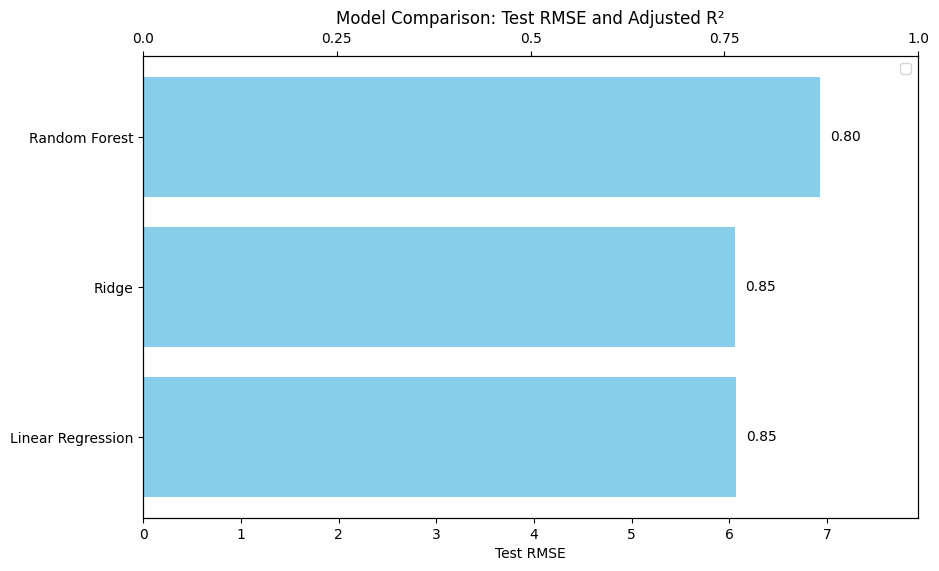

In [53]:
import matplotlib.pyplot as plt

# Prepare model names and metrics for visualization
model_names = ['Linear Regression', 'Ridge', 'Random Forest']
rmse_values = [
    6.07,  # Linear Regression RMSE
    6.06,  # Ridge RMSE
    6.93   # Random Forest RMSE
]
adjusted_r2_values = [
    0.85,  # Linear Regression Adjusted R²
    0.85,  # Ridge Adjusted R²
    0.80   # Random Forest Adjusted R²
]

# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RMSE values
ax1.barh(model_names, rmse_values, color='skyblue', label='Test RMSE')
ax1.set_xlabel('Test RMSE')
ax1.set_title('Model Comparison: Test RMSE and Adjusted R²')
ax1.set_xlim(0, max(rmse_values) + 1)  # Set x-axis limit

# Create a second y-axis for Adjusted R²
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())  # Sync x-axis limits
ax2.set_xticks(np.linspace(0, max(rmse_values) + 1, 5))  # Set same ticks
ax2.set_xticklabels(np.round(np.linspace(0, 1, 5), 2))  # Adjusted R² scale

# Annotate adjusted R² on the plot
for i, v in enumerate(adjusted_r2_values):
    ax1.text(rmse_values[i] + 0.1, i, f'{v:.2f}', color='black', va='center')

# Show the plot
plt.legend(loc='upper right')
plt.show()

In [54]:
import pandas as pd

# Make predictions on the test set using both models
linear_pred = best_linear_model.predict(X_test)
ridge_pred = best_ridge_model.predict(X_test)

# Create a DataFrame to compare actual vs predicted values for both models
results_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Predicted': linear_pred,
    'Ridge Predicted': ridge_pred
})

# Display the DataFrame
print(results_df.head())  # Show the first few rows

     Actual  Linear Predicted  Ridge Predicted
521    64.2         63.860043        63.942442
737    72.7         82.495430        82.009532
740    79.0         76.318817        76.212276
660    79.5         70.944189        70.808507
411    58.2         58.781302        59.375376
